In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import MinMaxScaler



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Big Data Analytics/titanic_train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Big Data Analytics/titanic_test.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1.0


In [ ]:
df.dtypes

In [ ]:
df_test.head()

In [ ]:
df.isnull().sum()

In [ ]:
df_test.isnull().sum()

In [ ]:
df["Embarked"].value_counts()

In [ ]:
#Nominal to numerical
Embarked = {"S":1, "C":2, "Q":3}
df["Embarked"] = df["Embarked"].map(Embarked)
df_test["Embarked"] = df_test["Embarked"].map(Embarked)

Sex = {"male":1, "female":2}
df["Sex"] = df["Sex"].map(Sex)
df_test["Sex"] = df_test["Sex"].map(Sex)


In [ ]:
#Fill Nan
df["Age"] = df["Age"].fillna(np.nanmean(df["Age"]))
df_test["Age"] = df_test["Age"].fillna(np.nanmean(df_test["Age"]))

df["Embarked"] = df["Embarked"].fillna(1.0)

df_test["Fare"] = df_test["Fare"].fillna(np.nanmean(df_test["Fare"]))


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,0.271174,1,0,A/5 21171,0.014151,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,0.472229,1,0,PC 17599,0.139136,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",2,0.321438,0,0,STON/O2. 3101282,0.015469,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,0.434531,1,0,113803,0.103644,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",1,0.434531,0,0,373450,0.015713,NaN,1.0


In [ ]:
#Normalization
scaler = MinMaxScaler()
df[["Age"]] = scaler.fit_transform(df[["Age"]])
df[["Fare"]] = scaler.fit_transform(df[["Fare"]])

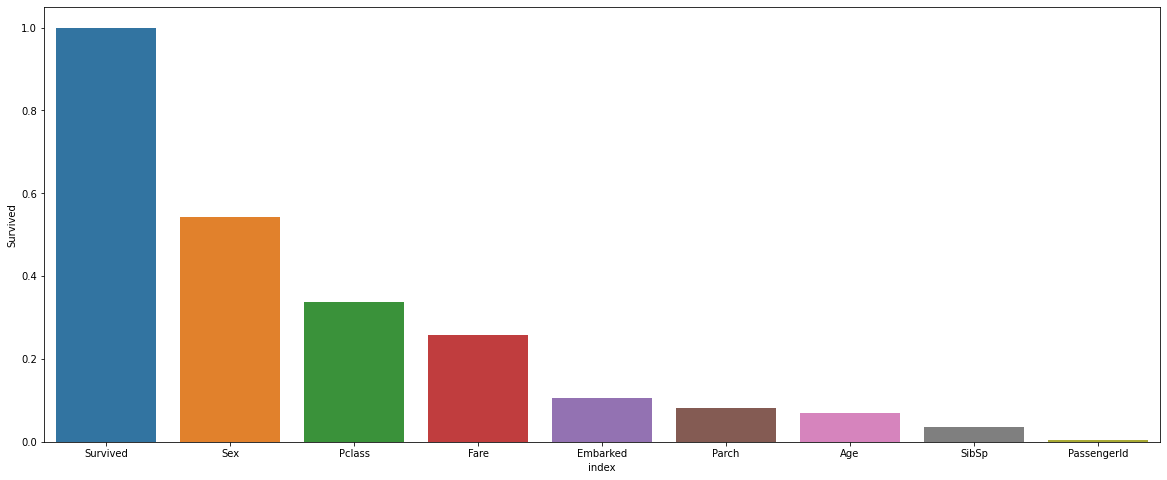

In [ ]:
#Correalations with survived and all the others variables
corr_df = pd.DataFrame(abs(df.corr()['Survived']).sort_values(ascending=False) )
corr_df['index'] = corr_df.index
plt.figure(figsize=(20,8))
sns.barplot(x='index',y='Survived',data=corr_df)

In [ ]:
valid_arr = ["Sex", "Pclass", "Fare", "Embarked", "Parch", "Age", "SibSp"]

In [ ]:
#Based on the above barplot, delete "PasengerId", "Name", "Ticket", "Cabin"
X = df[valid_arr]

In [ ]:
y = df[["Survived"]]

In [ ]:
X.isnull().sum()

In [ ]:
y.isnull().sum()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=234)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

In [ ]:
result = {}
models = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    LDA(),
    QDA(),
    MLPClassifier(),
    LogisticRegression(),
    GradientBoostingClassifier(),
    LGBMClassifier()]
models_name = ["KNN", "SVC", "DT", "RF", "Adaboost", "GaussianNB", "LDA", "QDA", "Multilayer Perceptron", "LogisticRegression", "xgb", "lgbm"]

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


In [ ]:
for i,model in enumerate(models):
    print("%s Model fitting......"%models_name[i])
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    result[models_name[i]] = {}
    result[models_name[i]]["accuracy_training"] = accuracy_score(y_train, y_train_pred)
    result[models_name[i]]["accuracy_testing"] = accuracy_score(y_test, y_test_pred)
    result[models_name[i]]["cross_val_score_training"] = cross_val_score(model, y_train, y_train_pred, cv=5).mean()
    result[models_name[i]]["cross_val_score_testing"] = cross_val_score(model, y_test, y_test_pred, cv=5).mean()


In [ ]:
pd.DataFrame(result)

,KNN,SVC,DT,RF,Adaboost,GaussianNB,LDA,QDA,Multilayer Perceptron,LogisticRegression,xgb,lgbm
accuracy_training,0.869382,0.813202,0.984551,0.984551,0.837079,0.787921,0.793539,0.810393,0.820225,0.807584,0.898876,0.942416
accuracy_testing,0.759777,0.793296,0.765363,0.798883,0.798883,0.793296,0.798883,0.798883,0.804469,0.793296,0.804469,0.798883
cross_val_score_training,0.869447,0.813316,0.984546,0.984537,0.837230,0.788082,0.793657,0.810558,0.820329,0.807692,0.898976,0.942451
cross_val_score_testing,0.675556,0.793651,0.765238,0.798730,0.799365,0.793651,0.799206,0.799048,0.804921,0.793651,0.804603,0.799048


In [ ]:
models[8]

In [ ]:
result_mlp = {}
models_mlp = [
            MLPClassifier(learning_rate_init = 0.001),
            MLPClassifier(learning_rate_init = 0.01),
            MLPClassifier(learning_rate_init = 0.05),
            MLPClassifier(learning_rate_init = 0.1)
            ]
models_mlp_name = ["learning_rate = 0.001", "learning_rate = 0.01", "learning_rate = 0.05", "learning_rate = 0.1"]

#############

for i,model in enumerate(models_mlp):
    print("%s Model fitting......"%models_mlp_name[i])
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    result_mlp[models_mlp_name[i]] = {}
    result_mlp[models_mlp_name[i]]["accuracy_training"] = accuracy_score(y_train, y_train_pred)
    result_mlp[models_mlp_name[i]]["accuracy_testing"] = accuracy_score(y_test, y_test_pred)
    result_mlp[models_mlp_name[i]]["cross_val_score_training"] = cross_val_score(model, y_train, y_train_pred, cv=5).mean()
    result_mlp[models_mlp_name[i]]["cross_val_score_testing"] = cross_val_score(model, y_test, y_test_pred, cv=5).mean()

In [ ]:
pd.DataFrame(result_mlp)

,learning_rate = 0.001,learning_rate = 0.01,learning_rate = 0.05,learning_rate = 0.1
accuracy_training,0.818820,0.842697,0.830056,0.841292
accuracy_testing,0.821229,0.826816,0.793296,0.810056
cross_val_score_training,0.818950,0.842815,0.830119,0.841416
cross_val_score_testing,0.821587,0.827143,0.793492,0.810476


In [ ]:
result_xgb = {}
models_xgb = [
            GradientBoostingClassifier(max_depth=2),
            GradientBoostingClassifier(max_depth=4),
            GradientBoostingClassifier(max_depth=6),
            GradientBoostingClassifier(max_depth=8),
            GradientBoostingClassifier(max_depth=10) 
            ]
models_xgb_name = ["max_depth=2", "max_depth=4", "max_depth=6", "max_depth=8", "max_depth=10"]

#############

for i,model in enumerate(models_xgb):
    print("%s Model fitting......"%models_xgb_name[i])
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    result_xgb[models_xgb_name[i]] = {}
    result_xgb[models_xgb_name[i]]["accuracy_training"] = accuracy_score(y_train, y_train_pred)
    result_xgb[models_xgb_name[i]]["accuracy_testing"] = accuracy_score(y_test, y_test_pred)
    result_xgb[models_xgb_name[i]]["cross_val_score_training"] = cross_val_score(model, y_train, y_train_pred, cv=5).mean()
    result_xgb[models_xgb_name[i]]["cross_val_score_testing"] = cross_val_score(model, y_test, y_test_pred, cv=5).mean()

In [ ]:
pd.DataFrame(result_xgb)

,max_depth=2,max_depth=4,max_depth=6,max_depth=8,max_depth=10
accuracy_training,0.846910,0.939607,0.971910,0.984551,0.984551
accuracy_testing,0.793296,0.821229,0.804469,0.798883,0.787709
cross_val_score_training,0.847001,0.939683,0.971929,0.984546,0.984546
cross_val_score_testing,0.793810,0.821587,0.804603,0.798730,0.787778


In [ ]:
def to_sub_csv(filename,model,valid_arr):
    X_t = df_test[valid_arr]
    y_t_pred = model.fit(X_train, y_train).predict(X_t)
    submit_survived = y_t_pred
    submit = pd.DataFrame({"PassengerId":df_test["PassengerId"],
                  "Survived":submit_survived})
    submit.to_csv('%s.csv'%filename, index=False)

In [ ]:
for i,model in enumerate(models_mlp):
    print(models_name[i])
    to_sub_csv("%s_submission"%models_mlp_name[i], models_mlp[i], valid_arr)